In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

import seaborn as sns

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df2 = pd.read_excel("ехель.xlsx")
df2 = df2.sample(frac=1).reset_index(drop=True)# shuffle
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100 rows and 6 columns


In [3]:
display(df2.head(5))
df2.columns

,min,"Hz,min",amperage,voltage,amperage2,"Hz,h"
0,97,50.017504,2.05115,226.514076,33.3725,49.986025
1,46,50.023528,2.05090,229.612268,33.3850,50.007942
2,52,50.023664,2.05130,229.194781,33.3785,50.029194
3,86,49.974493,2.05150,226.827192,33.3775,49.983688
4,6,49.961039,2.05080,230.551614,33.3730,50.009841


Index(['min', 'Hz,min', 'amperage', 'voltage', 'amperage2', 'Hz,h'], dtype='object')

In [5]:
cat_val = ['min', 'Hz,min', 'amperage', 'voltage',
       'amperage2', 'Hz,h']

for col in cat_val:
    print ([col]," : ",df2[col].unique())

['min']  :  [ 97  46  52  86   6  50  15  38  58  39  82  94  60   5  48  28  42  88
  27   3  62  24  43  78  87  34  90   9  36  68  96  33   1  77  89  95
  79  63  21  83  92  84 100  65  32  20  37  29  45  51  91  75   8  35
   4  85  93  57  30  61  66  74  12  99  76  25  69  17  80  56  44  67
  14  26  49  72  71  13   2  70  55  23  16  59  73  81  19  47  22  54
  11  40  10  64  98  18  31  53   7  41]
['Hz,min']  :  [50.0175043  50.02352773 50.02366408 49.97449308 49.96103897 50.00801691
 49.98209792 49.99303283 49.97586754 49.96880067 49.97135703 49.9700249
 50.02377577 50.01537006 50.01685232 49.99146056 49.99661851 49.9757293
 49.96320935 49.99420431 49.97928772 49.97833678 49.99361917 49.97827839
 49.97594169 49.97554071 50.01748355 49.99051563 49.96560567 49.96662892
 49.99269434 50.01266136 49.98029517 49.97932669 49.99440514 49.97695169
 50.02426218 50.0041142  49.9780779  49.99807403 49.98619817 49.96153182
 50.02376607 50.02331041 50.01480216 50.01540729 50.00206

<AxesSubplot:>

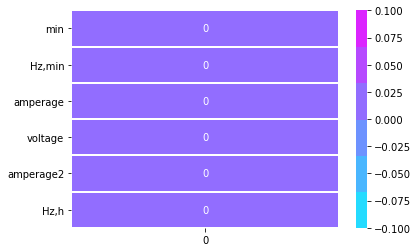

In [6]:
sns.heatmap(pd.DataFrame(df2.isnull().sum()),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")

In [7]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

min          0
Hz,min       0
amperage     0
voltage      0
amperage2    0
Hz,h         0
dtype: int64


In [8]:
#Train dataset
df2['min'].fillna(value='unknown', inplace=True)
df2['Hz,min'].fillna(value='unknown', inplace=True)
df2['amperage'].fillna(value='unknown', inplace=True)
df2['voltage'].fillna(value='unknown', inplace=True)
df2['amperage2'].fillna(value='unknown', inplace=True)
df2['Hz,h'].fillna(value='unknown', inplace=True)

In [9]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

min          0
Hz,min       0
amperage     0
voltage      0
amperage2    0
Hz,h         0
dtype: int64


In [10]:
df2['amperage'].fillna(df2['amperage'].value_counts().index[0],inplace = True)

In [11]:
print("Number of Null values in train dataset\n")
print(df2.isnull().sum(axis = 0))

Number of Null values in train dataset

min          0
Hz,min       0
amperage     0
voltage      0
amperage2    0
Hz,h         0
dtype: int64


In [12]:
df2=df2.dropna()

In [13]:
print("Train : ", df2.shape)

Train :  (100, 6)


In [14]:
df2.dtypes

min            int64
Hz,min       float64
amperage     float64
voltage      float64
amperage2    float64
Hz,h         float64
dtype: object

In [15]:
#Train dataset
df2.describe()

,min,"Hz,min",amperage,voltage,amperage2,"Hz,h"
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,50.500000,49.992880,2.051229,228.884523,33.37709,50.005883
std,29.011492,0.020372,0.000332,1.449258,0.00408,0.014928
min,1.000000,49.961039,2.050600,226.453651,33.36900,49.981066
25%,25.750000,49.975351,2.051100,227.468528,33.37400,49.993314
50%,50.500000,49.992274,2.051250,229.318379,33.37600,50.005215
75%,75.250000,50.012736,2.051400,230.190433,33.37900,50.019098
max,100.000000,50.024909,2.053500,230.705425,33.38600,50.029945


<AxesSubplot:xlabel='voltage', ylabel='Density'>

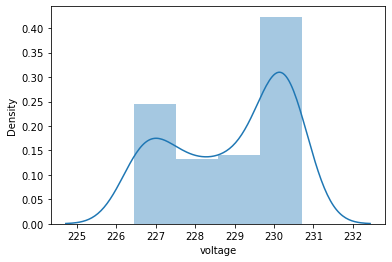

In [16]:
sns.distplot(df2["voltage"])

<AxesSubplot:xlabel='Hz,min', ylabel='Density'>

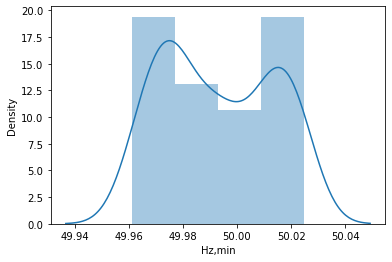

In [17]:
sns.distplot(df2["Hz,min"])

<AxesSubplot:xlabel='amperage', ylabel='Density'>

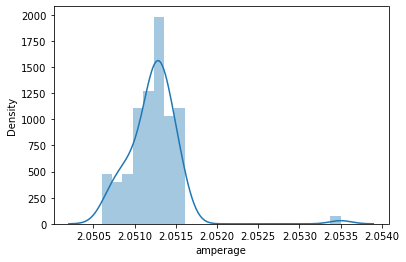

In [18]:
sns.distplot(df2["amperage"])

<AxesSubplot:xlabel='amperage2', ylabel='Density'>

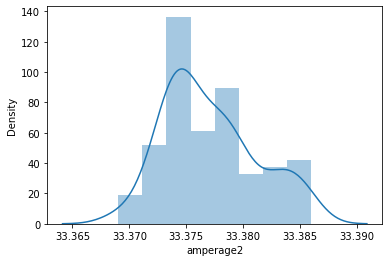

In [19]:
sns.distplot(df2["amperage2"])

In [20]:
cols=['voltage']


for i in cols:
    quartile_1,quartile_3 = np.percentile(df2[i],[25,75])
    quartile_f,quartile_l = np.percentile(df2[i],[1,99])
    IQR = quartile_3-quartile_1
    lower_bound = quartile_1 - (1.5*IQR)
    upper_bound = quartile_3 + (1.5*IQR)
    print(i,lower_bound,upper_bound,quartile_f,quartile_l)

    df2[i].loc[df2[i] < lower_bound] = quartile_f
    df2[i].loc[df2[i] > upper_bound] = quartile_l

voltage 223.38567177843908 234.2732890821698 226.47540398260475 230.69454795147632


In [21]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df2=remove_outlier(df2, 'voltage')

<AxesSubplot:xlabel='voltage', ylabel='Density'>

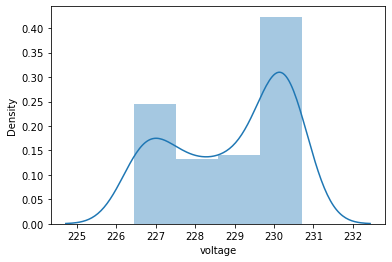

In [22]:
sns.distplot(df2["voltage"])

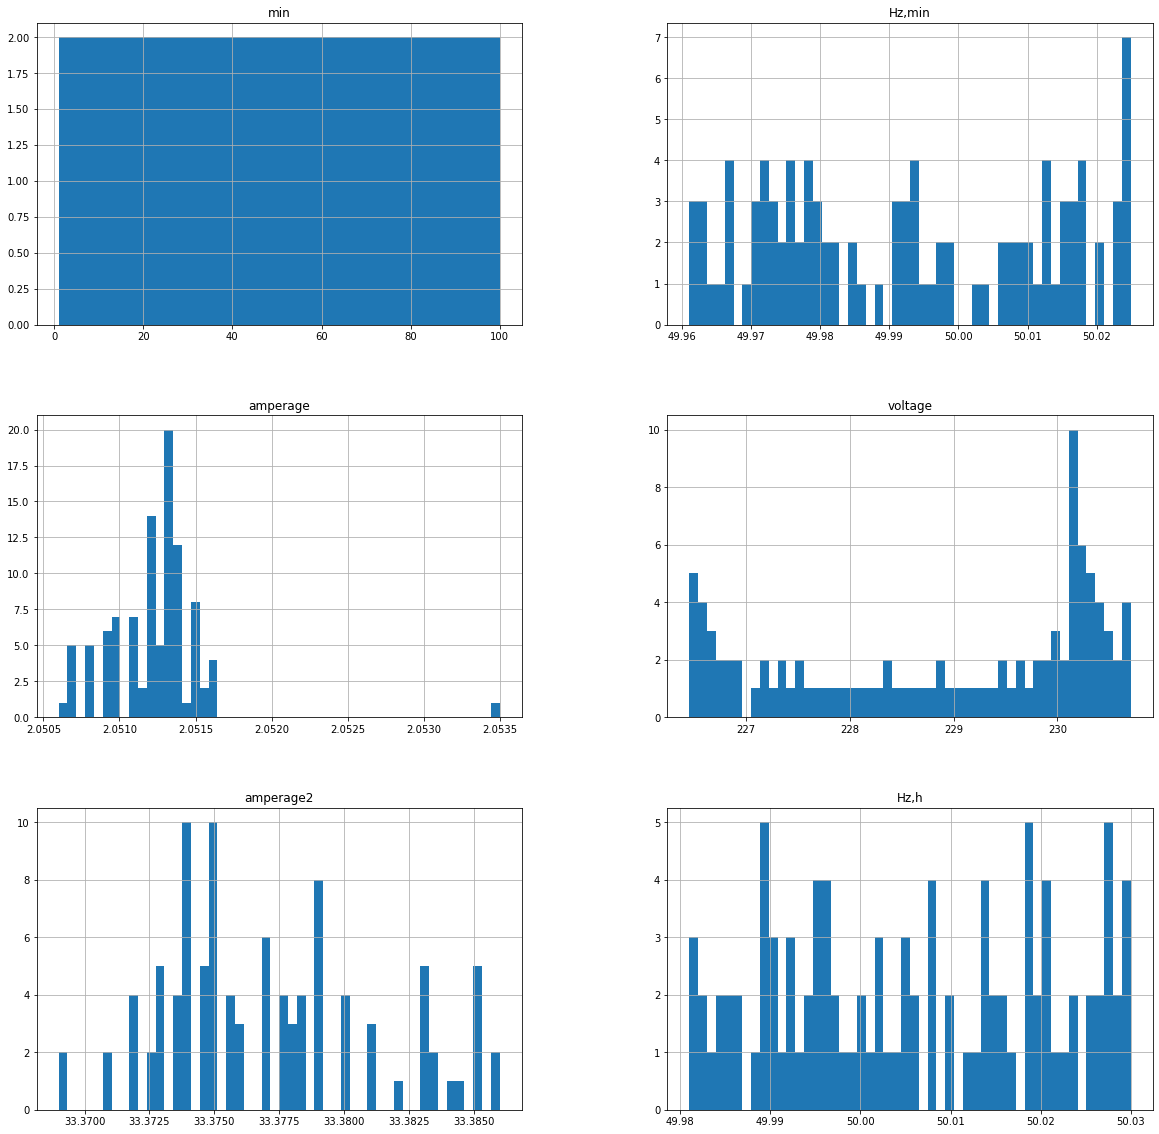

In [23]:
#Train Dataset
df2.hist(bins = 50 , figsize = (20,20))
plt.show()

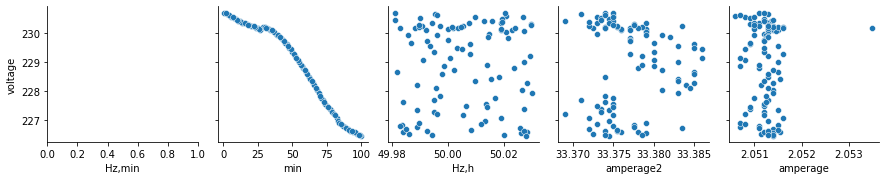

In [58]:
sns.pairplot(df2, x_vars=['Hz,min', 'min', 'Hz,h', 'amperage2', 'amperage'], y_vars=["voltage"],aspect=1);

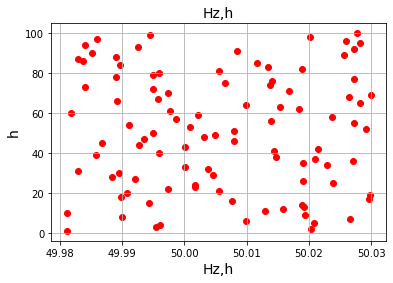

In [26]:
plt.scatter(df2['Hz,h'], df2['min'], color='red')
plt.title('Hz,h', fontsize=14)
plt.xlabel('Hz,h', fontsize=14)
plt.ylabel('h', fontsize=14)
plt.grid(True)
plt.show()

In [27]:
df3=pd.get_dummies(df2,drop_first=True)
df3.head()

,min,"Hz,min",amperage,voltage,amperage2,"Hz,h"
0,97,50.017504,2.05115,226.514076,33.3725,49.986025
1,46,50.023528,2.05090,229.612268,33.3850,50.007942
2,52,50.023664,2.05130,229.194781,33.3785,50.029194
3,86,49.974493,2.05150,226.827192,33.3775,49.983688
4,6,49.961039,2.05080,230.551614,33.3730,50.009841


In [28]:
df_y = df3['voltage'].values
df_X = df3.drop(['voltage'], axis=1)

In [29]:
test_size = 0.30

#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_y, test_size=test_size,shuffle=True, random_state = 3)


X_test.to_csv("cleaned_test_set.tsv", sep='\t', encoding='utf-8',index=False)

temp2 = pd.DataFrame(data=Y_test.flatten())
temp2.columns = temp2.iloc[0]
temp2 = temp2.reindex(temp2.index.drop(0)).reset_index(drop=True)
temp2.columns.name = None
temp2.to_csv("actual_voltage_test.tsv", sep='\t', encoding='utf-8',index=False)

In [81]:
rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [10]}

In [82]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.5s finished


In [83]:
print(gs.best_score_)
print(gs.best_params_)

0.9736903296036554
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}


In [84]:
bp = gs.best_params_
rf_regressor = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=10)

In [85]:
print("Train R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_train, Y_train))

Train R^2 Score:
Score: 1.00


In [86]:
#Predicting voltage using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X_train, Y_train, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(Y_train, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: %.2f '% accuracy_rf)

Cross-Predicted(KFold) Random Forest Regression Accuracy: 0.99 


In [87]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [88]:
scores = cross_val_score(rf_regressor, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [0.08198376 0.12193997 0.11643272 0.16186652 0.13223863]
Mean: 0.1228923198148276
Standard deviation: 0.025777839531791726


In [71]:
print("Test R^2 Score:")
print('Score: %.2f' % rf_regressor.score(X_test, Y_test))

Test R^2 Score:
Score: 1.00


In [72]:
y_pred=rf_regressor.predict(X_train)
y_pred[0:5]

array([226.54915775, 229.36207678, 230.61335611, 230.14015401,
       230.2186429 ])

In [73]:
list(Y_train[0:5])

[226.53055619134815,
 229.35957885099566,
 230.59555962462807,
 230.13962005035478,
 230.22751201647975]

In [74]:
# The root mean squared error
y_pred =rf_regressor.predict(X_train)

forest_mse = mean_squared_error(Y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)

print("Root Mean squared error (training): %.2f"
      % forest_rmse)

Root Mean squared error (training): 0.06


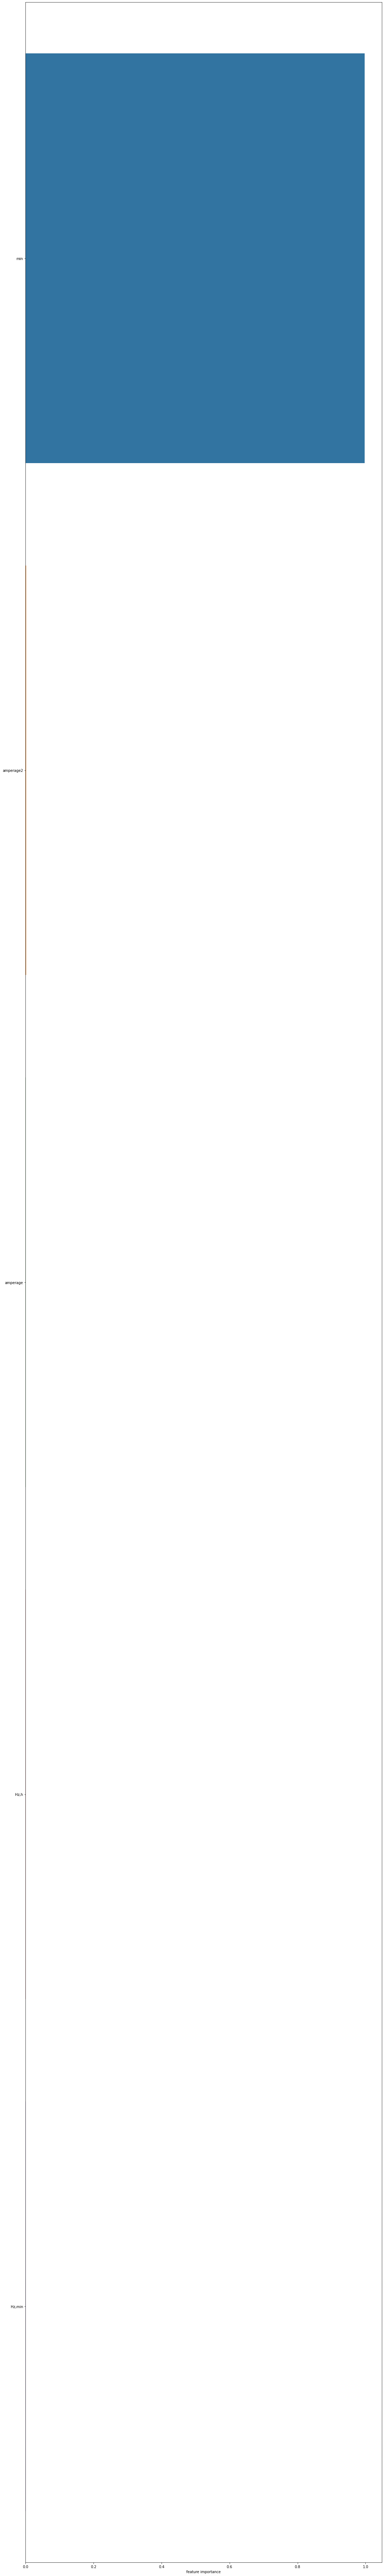

In [75]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [76]:
X_train1 = X_train.iloc[:,ranking[:5]]
X_test1 = X_test.iloc[:,ranking[:5]]

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

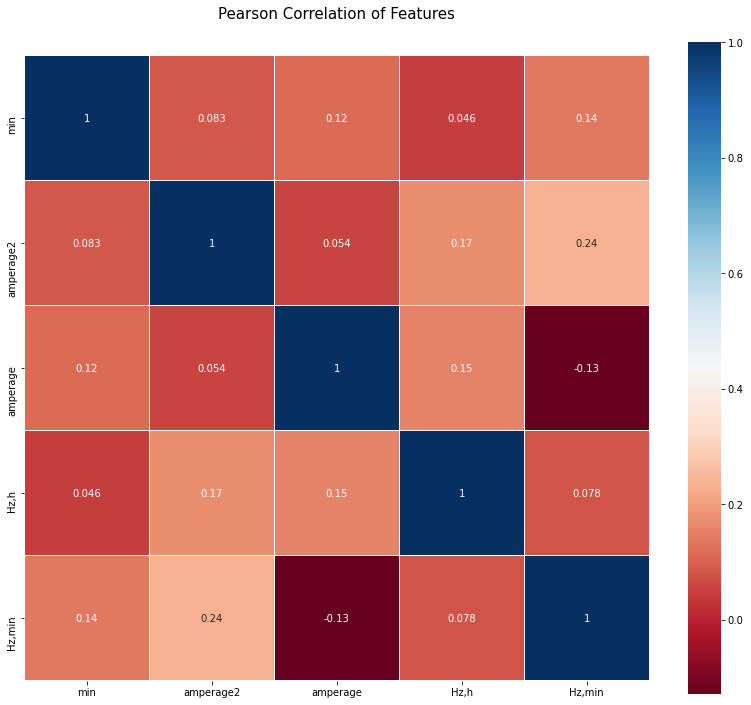

In [80]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [78]:
regr = LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression()

In [79]:
print('Train R^2 \nscore: %.2f' % regr.score(X_train, Y_train))

Train R^2 
score: 0.97


In [47]:
# The root mean squared error
y_pred =regr.predict(X_train)

lin_mse = mean_squared_error(Y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)

print("Root Mean squared error (training): %.2f"
      % lin_rmse)

Root Mean squared error (training): 0.27


In [48]:
#Predicting the Price using cross validation (KFold method)
y_pred_kf = cross_val_predict(regr, X_train, Y_train, cv=10 )

#Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(Y_train, y_pred_kf)
print('Cross-Predicted(KFold) Linear Regression Accuracy: %.2f' % accuracy_lf)

Cross-Predicted(KFold) Linear Regression Accuracy: 0.96


In [49]:
scores = cross_val_score(regr, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores= np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [0.30847927 0.29507813 0.35085721 0.24377533 0.24102559]
Mean: 0.28784310614804176
Standard deviation: 0.04143144644335176


In [50]:
#intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

Intercept: 
 -1993.6038427643555
Coefficients: 
 [-4.98683426e-02  2.65215142e+00  1.88836129e+02  5.17706948e+01
 -4.56951987e-01]


In [51]:
y_pred[0:5]

array([226.7699784 , 229.13275538, 231.01233648, 229.96704338,
       230.32694224])

In [52]:
list(Y_train[0:5])

[226.53055619134815,
 229.35957885099566,
 230.59555962462807,
 230.13962005035478,
 230.22751201647975]

Text(0, 0.5, 'Predictions')

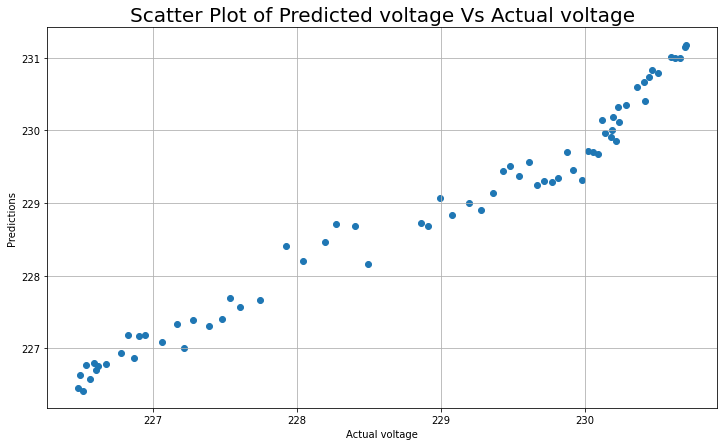

In [53]:
y_pred = regr.predict(X_train)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted voltage Vs Actual voltage', y=1, size=20)
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual voltage")
plt.ylabel("Predictions")

<AxesSubplot:title={'center':'Residual Plot for Linear Regression'}>

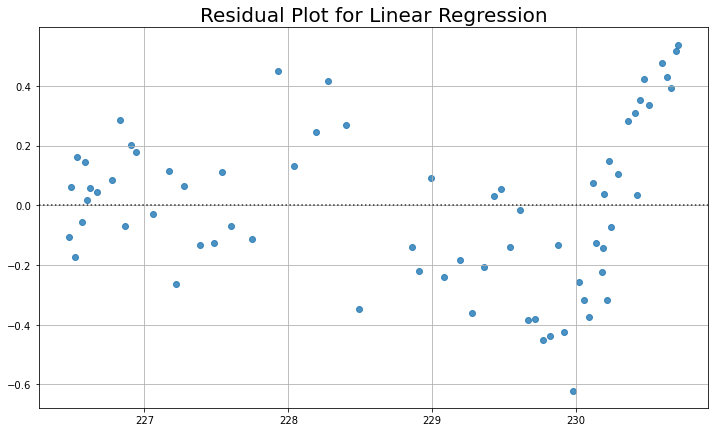

In [54]:
plt.figure(figsize=(12,7)) 
plt.grid(True)
plt.title('Residual Plot for Linear Regression', y=1, size=20) 
sns.residplot(Y_train,y_pred) # regression Residual Plot for linear regression model using bootstrapping

In [55]:
print('Test R^2 \nscore: %.2f' % regr.score(X_test, Y_test))

Test R^2 
score: 0.96


In [56]:
submission = rf_regressor.predict(X_test)
filename = 'submission.csv'

temp2 = pd.DataFrame(data=submission.flatten())
temp2.columns = temp2.iloc[0]
temp2 = temp2.reindex(temp2.index.drop(0)).reset_index(drop=True)
temp2.columns.name = None
temp2.to_csv("submission.tsv", sep='\t', encoding='utf-8',index=False)